## K-Nearest Neighbour

In [1]:
# its a classification model
# K- represents number
# K should never be even
# Dataset should be labelled and small

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 

In [3]:
dataset= pd.read_csv(r'C:/Users/Shambhavi/Downloads/datasets/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [7]:
import seaborn as sb

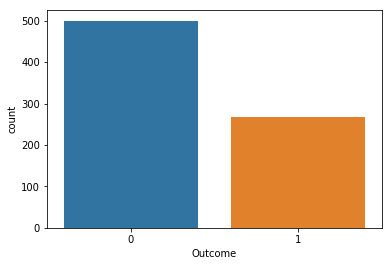

In [8]:
sb.countplot(dataset['Outcome'],label='count')

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset.loc[:,dataset.columns!='Outcome'],dataset['Outcome'],stratify=dataset['Outcome'],random_state=66)

In [ ]:
#stratify = balance 0 and 1

In [13]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
612,7,168,88,42,321,38.2,0.787,40
557,8,110,76,0,0,27.8,0.237,58
26,7,147,76,0,0,39.4,0.257,43
70,2,100,66,20,90,32.9,0.867,28
73,4,129,86,20,270,35.1,0.231,23
15,7,100,0,0,0,30.0,0.484,32
168,4,110,66,0,0,31.9,0.471,29
249,1,111,86,19,0,30.1,0.143,23
696,3,169,74,19,125,29.9,0.268,31
461,1,71,62,0,0,21.8,0.416,26


In [18]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    #building the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train,y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(X_test,y_test))    

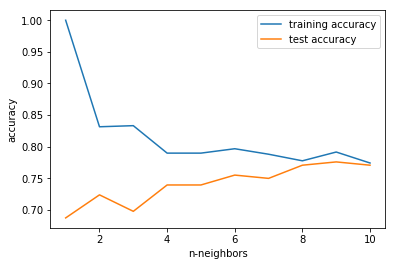

In [19]:
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n-neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [20]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)


0.7760416666666666